In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
dataset = pd.read_csv('ScreenTime vs MentalWellness.csv')
dataset.head(4)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN


Text(0, 0.5, 'Numbers')

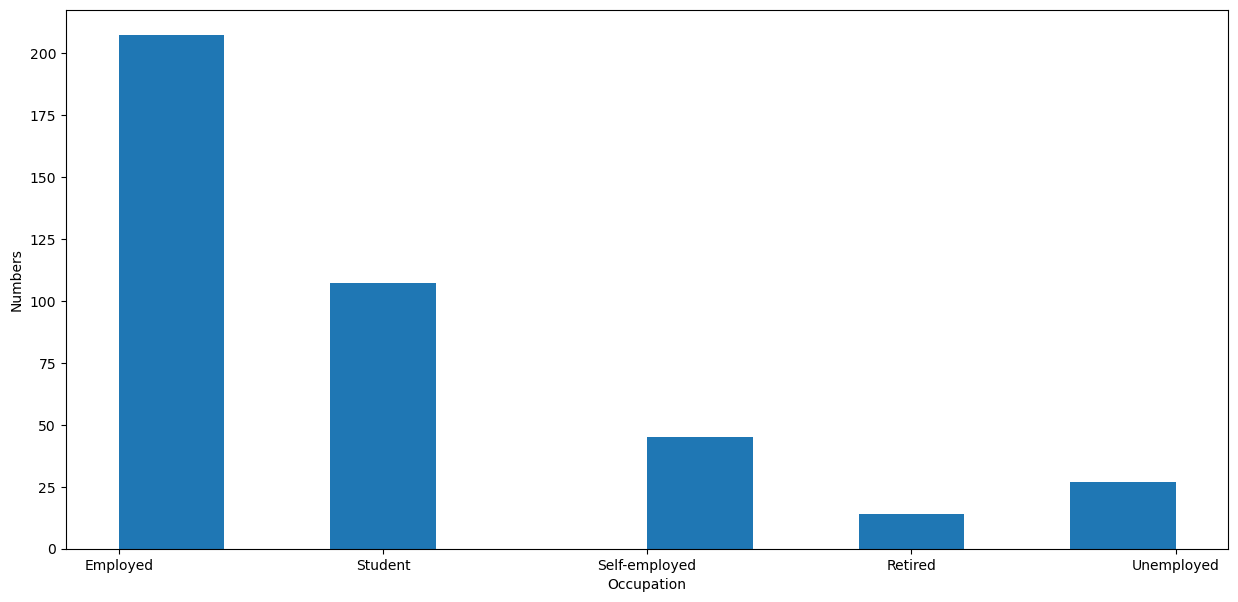

In [39]:
plt.figure(figsize=(15,7))
plt.hist(dataset['occupation'],align='mid',histtype='bar')
plt.xlabel('Occupation')
plt.ylabel('Numbers')

In [40]:
dataset.columns

Index(['user_id', 'age', 'gender', 'occupation', 'work_mode',
       'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
       'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10',
       'productivity_0_100', 'exercise_minutes_per_week',
       'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15'],
      dtype='object')

In [69]:
dataset.drop(['user_id', 'age', 'gender', 'occupation', 'work_mode','Unnamed: 15'],axis=1,inplace=True)

In [70]:
dataset.head(5)

,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


In [71]:
x = dataset.drop(['mental_wellness_index_0_100'],axis=1)
y = dataset['mental_wellness_index_0_100']

In [72]:
# spliting the dataset into train and test dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=20)

In [73]:
x_test.shape,x_train.shape

((80, 9), (320, 9))

<Axes: >

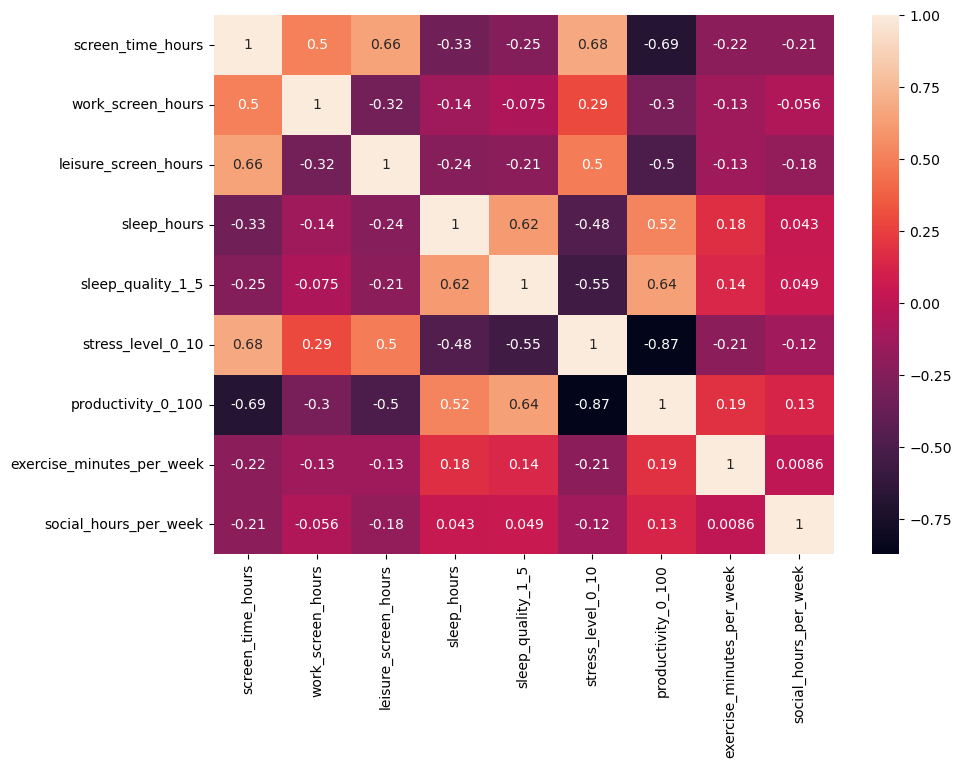

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(x_train.corr(),annot=True)

In [74]:
# finding the co-related feature or collinearity
def corelated_feature(dataset,threshold):
    new_col = set()
    col_metrix = dataset.corr()
    for i in range(len(col_metrix.columns)):
        for j in range(i):
            if abs(col_metrix.iloc[i,j]) > threshold:
                new_col.add(col_metrix.columns[i])
    return new_col

In [75]:
features = corelated_feature(x_train,0.85)
features
# so this is highly co-related features so we need to remove it

{'productivity_0_100'}

In [76]:
x_train.drop('productivity_0_100',axis=1,inplace=True)
x_test.drop('productivity_0_100',axis=1,inplace=True)

In [77]:
x_train.shape,x_test.shape

((320, 8), (80, 8))

In [78]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [79]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

<Axes: >

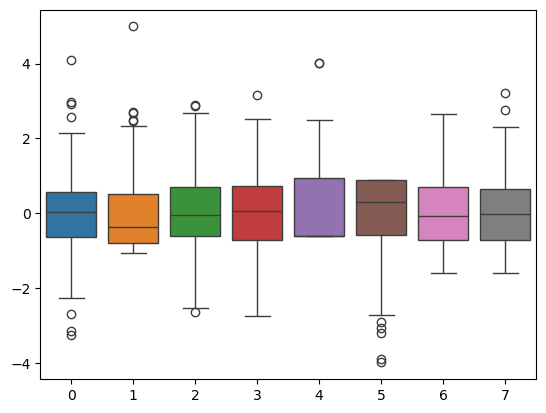

In [89]:
sns.boxplot(x_train_scaled)
# there is numbers of outliears so we need to handle it

## Linear model

In [196]:
# traning the model and selecting it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linear_regression = LinearRegression()
linear_regression.fit(x_train_scaled,y_train)
y_pred = linear_regression.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")
# our model is performing too worse 
# r2 value is very low and error is very high

R2 Score value:-30.90686484942404
Mean Absolute Error:91.01740114308143


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [106]:
linear_regression.coef_

array([ -0.78302125,  -0.45595194,  -0.45992639,   0.34342727,
         6.95388297, -13.35942679,   1.44106662,  -0.83622011])

## Lasso regression

In [194]:
# traning the model and selecting it
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso_reg = Lasso()
lasso_reg.fit(x_train_scaled,y_train)
y_pred = lasso_reg.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")
# Here we can see r2 score is higher the previous and Error also less
# this model perform well as compare to previous but not best still

#  -0.42461216,  -0.        ,  -0.        ,   0.        ,
        #  6.3070511 , -13.44498778,   0.66617556,  -0.        ]
# here there are lots of cofficent which is not highly related to output their coffient is 0 so
# it they are getting good output as compare to other model

R2 Score value:-6.9222800123168735
Mean Absolute Error:48.27180622997055


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


<Axes: ylabel='Count'>

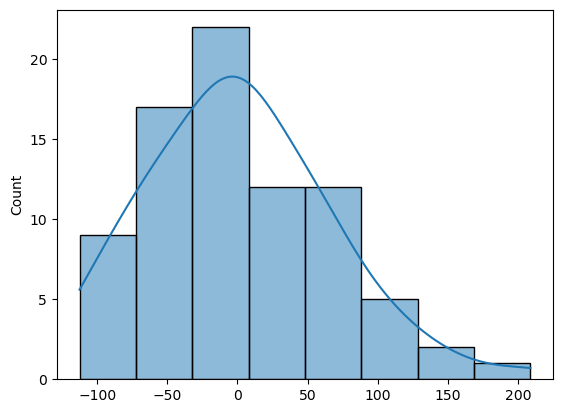

In [195]:
sns.histplot(y_pred,kde=True)

In [104]:
lasso_reg.coef_

array([ -0.42461216,  -0.        ,  -0.        ,   0.        ,
         6.3070511 , -13.44498778,   0.66617556,  -0.        ])

## Ridge regression

In [97]:
# traning the model and selecting it
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge_reg = Ridge()
ridge_reg.fit(x_train_scaled,y_train)
y_pred = ridge_reg.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")
# our model is performing too worse 
# r2 value is very low and error is very high

R2 Score value:-30.930027183770175
Mean Absolute Error:91.0483093685481


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


## Elasticnet regression

In [107]:
# traning the model and selecting it
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled,y_train)
y_pred = elastic_net.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")
# our model is performing too worse 
# r2 value is very low and error is very high

R2 Score value:-19.848293385875838
Mean Absolute Error:73.21607209618045


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


## Cross validation
hyperparameter tuning with cross-validation
Lasso regression is getting good output so here we are hyper tuinig the lasso regression.
Also hyper parameter tuning in elasticnet CV 

In [201]:
# traning the model and selecting it
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error
lassocv_reg = LassoCV(cv=5,alphas=1)
lassocv_reg.fit(x_train_scaled,y_train)
y_pred = lassocv_reg.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")

# here we get the little bit good result as compare to other model previously used
# Lasso model provide the r2 value = -6.474417781532354
# When we use the LassCV r2 value = -0.00023695872595763667
# This result is n't good but we are getting better result as compare to other model

R2 Score value:-0.00023695872595763667
Mean Absolute Error:17.365773437499993


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [180]:
lassocv_reg.alpha_

np.float64(18.46609682795045)

## ElasticNet CV 

In [182]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet_cv = ElasticNet(alpha=10,l1_ratio=1)
elasticnet_cv.fit(x_train_scaled,y_train)
y_pred = elasticnet_cv.predict(x_test)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score value:{score}")
print(f"Mean Absolute Error:{mae}")

# We are using the alpha vlaue 10 and l1_ratio is 1 still didn't get the good result as compare to LassCV

R2 Score value:-8.584346074044221
Mean Absolute Error:64.95560809088188


/Users/bhaskarrai/Desktop/100-days-/day_68/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
